In [1]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = pg.read_output('summary.h5')

In [3]:
s

E_norm,M_star,R_star,freq,l,n_pg,omega
float64,float64,float64,complex128,int32,int32,complex128
0.9534678781441062,1.9884098706980504e+33,72059797095.86208,(4.922353785347793+0j),2,-20,(0.6010667246322218+0j)
0.8878468667978847,1.9884098706980504e+33,72059797095.86208,(5.161486793246025+0j),2,-19,(0.6302671641123527+0j)
0.8455545196463746,1.9884098706980504e+33,72059797095.86208,(5.424139074133421+0j),2,-18,(0.6623395329575381+0j)
0.7911558386982104,1.9884098706980504e+33,72059797095.86208,(5.714724461655157+0j),2,-17,(0.6978228026939767+0j)
0.7362531087690062,1.9884098706980504e+33,72059797095.86208,(6.036261703836192+0j),2,-16,(0.7370855914801705+0j)
0.6878449628689471,1.9884098706980504e+33,72059797095.86208,(6.396457372034251+0j),2,-15,(0.781068945776031+0j)
0.6472906942939484,1.9884098706980504e+33,72059797095.86208,(6.79704559554982+0j),2,-14,(0.8299846194424517+0j)
0.5967000462386621,1.9884098706980504e+33,72059797095.86208,(7.253814076363403+0j),2,-13,(0.8857604426868302+0j)
0.5571395336453346,1.9884098706980504e+33,72059797095.86208,(7.770618919461172+0j),2,-12,(0.9488672830036518+0j)


In [6]:
d = pg.read_output('detail.l2.n+0.h5')
d

As,Gamma_1,M_r,V_2,c_1,rho,x,xi_h,xi_r
float64,float64,float64,float64,float64,float64,float64,complex128,complex128
0.0,1.6652855411512768,0.0,149.8870384512944,0.007827406180246348,162.07660294133072,0.0,0j,0j
9.590908831915168e-05,1.6652855997850253,3.107094008834461e+26,149.87605143118947,0.00782788655469073,162.06128653461994,0.0010694594821400272,(0.04174092132341449+0j),(0.08350156389032223+0j)
0.00015222818522456436,1.6652856380475363,6.214188035536512e+26,149.86980983561955,0.007828145976465592,162.0512921220113,0.0013474493996669652,(0.052574143222926494+0j),(0.10518749763517564+0j)
0.000241607016231319,1.665285697612286,1.242837608673303e+27,149.8594299674627,0.00782858457965144,162.03573742239638,0.0016977115688641636,(0.06620717193737855+0j),(0.1324925535273792+0j)
0.00038342597878099577,1.6652857919832413,2.485675218912607e+27,149.84270682347042,0.007829294242578307,162.01110255261585,0.0021390471738387904,(0.08335167230399781+0j),(0.16685959945290352+0j)
0.0006083957248834433,1.665285941830003,4.971350439170456e+27,149.81604152008302,0.007830427536456372,161.97200867343616,0.0026951605906373457,(0.10488839707986794+0j),(0.21008899773824957+0j)
0.0009651257065970931,1.6652861800259138,9.942700879906916e+27,149.77366475426024,0.00783223007123149,161.9099214963081,0.003395950099472702,(0.13189529829304739+0j),(0.2644140647834147+0j)
0.0015306132093410153,1.6652865549028033,1.988540176115907e+28,149.70653901753258,0.007835093579965874,161.812354644994,0.004279150381808378,(0.1656671635807687+0j),(0.3325787617751738+0j)
0.0021957050108702045,1.6652869864482367,3.421967984271641e+28,149.6288613373826,0.007838417474433347,161.70028645074433,0.0051286076280710885,(0.19780699757905645+0j),(0.3977500423966871+0j)


In [8]:
c0 = 299792458
GNewton = 6.67408*10**(-11)
Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [9]:
Rstar / (6.957 * 10 ** 8)

1.0357883728023871

In [10]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

1.7158874343228365

In [11]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.3971024982253203

In [12]:
(rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))

127.75624223049167

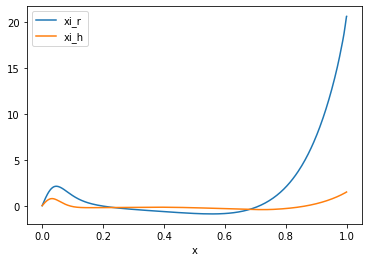

In [13]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/tmp/ipykernel_3509675/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


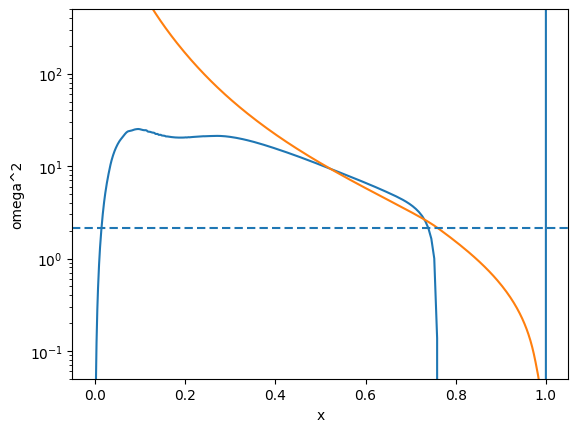

In [91]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [92]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [93]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [94]:
D_overlap **2 / N_overlap

(0.00022988971503408548+0j)